In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from utils import *

plt.style.use('deeplearning.mplstyle')

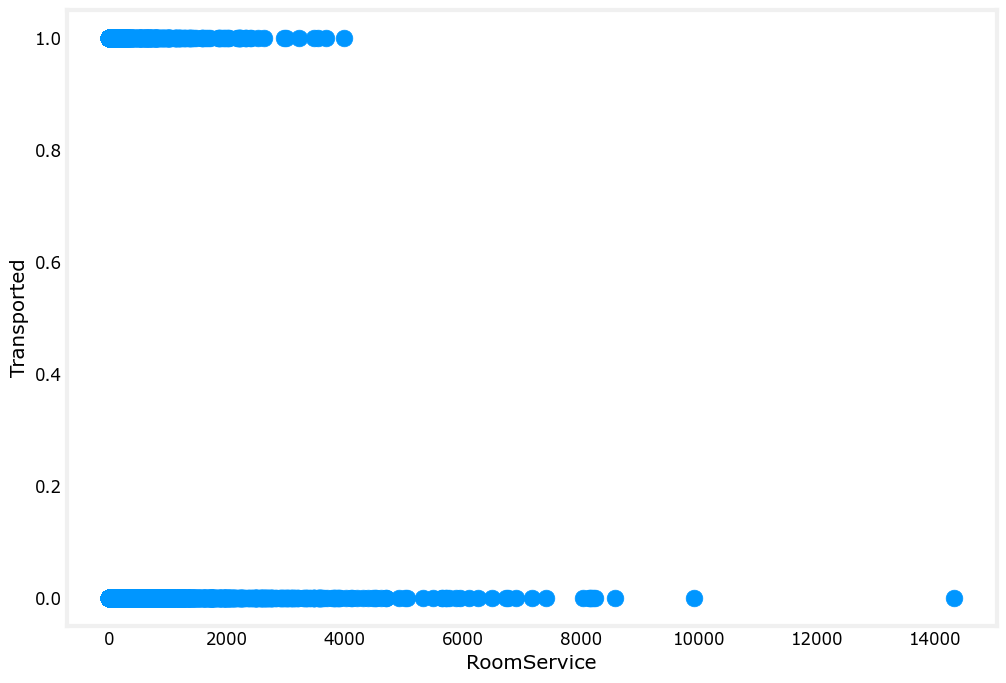

In [2]:
# viewing the features in relation the target data
filepath = './data/train.csv'
visual = pd.read_csv(filepath)
plt.scatter(visual['RoomService'], visual['Transported'])
plt.xlabel('RoomService')
plt.ylabel('Transported')
plt.show()

In [5]:
train_data = modify_data(filepath)
X = train_data.drop(['Transported'], axis=1)
Y = train_data['Transported']

x_tra, x_cv, Y_tra, y_cv = train_test_split(X, Y, test_size=0.3, random_state=42)
print(x_tra.shape)
print(x_cv.shape)
print(Y_tra.shape)
print(y_cv.shape)

Data before preprocessing...
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3      

In [ ]:
# Training a Logistic Regression Model
degree = 3
threshold = 0.6
models = []
scalers = []
polys = []
accuracy_scores = np.zeros(degree, 2)
for i in range(1, degree+1):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    x_tra_poly = poly.fit_transform(x_tra)
    x_cv_poly = poly.fit_transform(x_cv)
    polys.append(poly)
    
    scaler = StandardScaler()
    X_mapped = scaler.fit_transform(x_tra_poly)
    X_cv_mapped = scaler.transform(x_cv_poly)
    scalers.append(scaler)
    
    print(f'Training Model with degree {i}...')
    model = LogisticRegression()
    model.fit(X_mapped, Y_tra)
    models.append(model)
    print(f'Model Trained with degree {i}')
    
    yhat = model.predict_proba(X_mapped)
    yhat = np.where(yhat >= threshold, 1, 0)
    accuracy_scores[i-1, 0] = accuracy_score(Y_tra, yhat)
    
    yhatcv = model.predict_proba(X_cv_mapped)
    yhatcv = np.where(yhatcv >= threshold, 1, 0)
    accuracy_scores[i-1, 1] = accuracy_score(y_cv, yhatcv)
    
    
for i in range(degree):
    print(f'Degree {i+1} Accuracy Score: {accuracy_scores[i]}')
    

In [ ]:
# Scaling of data for other models
scaling = StandardScaler()
x_tra_scale = scaling.fit_transform(x_tra)
x_cv_scale = scaling.transform(x_cv)

In [ ]:
# Training an Ensemble Classifier Model


In [ ]:
# Training a Neural Network
nn_model = build_nn()
threshold = 0.6
accuracy_scores_nn = np.zeros(3, 2)
i = 0
for nn in nn_model:
    
    nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True))
    
    print(f'Training {nn.name}...')
    
    nn.fit(x_tra_scale, Y_tra, epochs=150, verbose=0)
    
    print(f'{nn.name} trained')
    
    yhat_nn = nn.predict(x_tra_scale)
    yhat_nn = tf.math.sigmoid(yhat_nn)
    yhat_nn = np.where(yhat_nn >= threshold, 1, 0)
    accuracy_scores_nn[i, 0] = accuracy_score(Y_tra, yhat_nn)
    
    yhat_cv_nn = nn.predict(x_cv_scale)
    yhat_cv_nn = tf.math.sigmoid(yhat_cv_nn)
    yhat_cv_nn = np.where(yhat_cv_nn >= threshold, 1, 0)
    accuracy_scores_nn[i, 1] = accuracy_score(y_cv, yhat_cv_nn)
    
    i += 1
    
for j in range(3):
    print(f'The Accuracy Score for {nn_model[j].name}: {accuracy_scores_nn[j]}')
    